
Title : Momentum and Nesterov Gradient Descent(D)

*   Type of content : Documentation
*   Domain : Machine Learning
*   Module: Dimensionality_Reduction_&_Neural_Networks





**Gradient Descent**

It's an iterative optimization algorithm to find local minima for a function.

GD has some limitations:

1. It can bounce on the search space on the optimization problem that have large amount of curvature or noisy gradient problems 
2. It can get stuck in flat space that have no gradients

**Momentum Gradient Descent**

Gradient With Momentum is an extension of Gradient Descent optimization with algorithm that allows to build inertia in a direction in the search space and overcome oscillation of noisy gradients and coast across flat spots  of the search space 

![image.png]()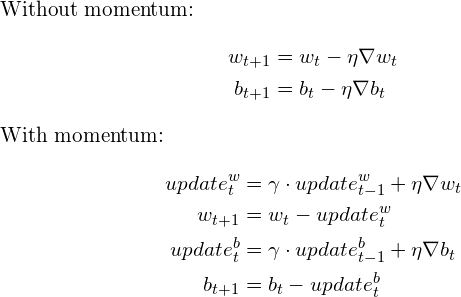

In [7]:
from numpy import asarray,arange
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt
from numpy import meshgrid


In [14]:
def objective(x):
  return x**2.0

def derivative(x):
  return x*2.0



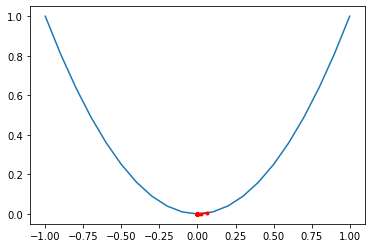

In [15]:
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	solutions, scores = list(), list() 	# track all solutions
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	
	change = 0.0 # keep track of the change

	for i in range(n_iter): 	# run the gradient descent
		
		gradient = derivative(solution) # calculate gradient
		
		new_change = step_size * gradient + momentum * change # calculate update
		
		solution = solution - new_change # take a step
		
		change = new_change # save the change
		
		solution_eval = objective(solution) # evaluate candidate point
		
		solutions.append(solution) # store solution
		scores.append(solution_eval)
		
	return [solutions, scores]
 

seed(3)

bounds = asarray([[-1.0, 1.0]]) # range for input

n_iter = 40 # total iterations

step_size = 0.2 #  the step size

momentum = 0.3 # momentum
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)

results = objective(inputs)

# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, '.-', color='red')
# show the plot
plt.show()

**Gradient Momentum with Nestrove**

Nestrove Gradient Descent is the extension of gradient descent optimization algorithm.

Difference in conventional momentum gradient descent and nestrove gradient descent is that update is performed using derivative of the projected update rather than the derivative current variable value

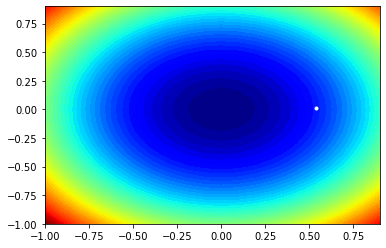

In [12]:
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])
 
def nestrove(objective, derivative, bounds, n_iter, step_size, momentum):
  solutions=list()
  #generate inital points
  solution=bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0]) 
  change=[0.0 for _ in range(bounds.shape[0])]
  # calculate gradient
  for it in range(n_iter):
    #projected solution
    projected=[solution[i]+momentum*change[i] for i in range(solution.shape[0])]
    #claculate gradient
    gradient=derivative(projected[0],projected[1])
    #build a solution
    new_solution=list()

    for i in range(solution.shape[0]):
      change[i]=(momentum*change[i])-step_size*gradient[i]
      #calculate  the change
      value=solution[i]+change[i]
      new_solution.append(value)
    
    solution = asarray(new_solution)
    solutions.append(solution)
    solution_eval=objective(solution[0],solution[1])

    return solutions
  
  seed(3)

bounds = asarray([[-1.0, 1.0],[-1.0,1.0]]) # define range for input

n_iter = 50 # define the total iterations

step_size = 0.2 # define the step size

momentum = 0.3 # define momentum
# perform the gradient descent search with momentum
solutions = nestrove(objective, derivative, bounds, n_iter, step_size, momentum)

xaxis=arange(bounds[0,0],bounds[0,1],0.1)
yaxis=arange(bounds[1,0],bounds[1,1],0.1)
# create a mesh 
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
plt.show()